

## The idea

I love to have maps in my mind. I don’t write “mind maps”, because they are a well\-known type of diagrams. Now I’m talking about having frames, structures or any kind of graphical representation in the mind. For example, I started learning addition by imagining dice in my mind.

So I prepared some drawings. It’s not necessary to be able to see the drawings to understand this post. I include an explanation for each of them, because of my awareness with accessibility.

Furthermore, in this case, it’s very important to teach the vocabulary. Otherwise they won’t understand the messages from Git. The drawings are a good way to introduce them that vocabulary.



## A distributed version control system

![](https://rachelcarmena.github.io/img/cards/posts/how-to-teach-Git/general-drawing.png)

The general drawing contains 4 areas distributed as follows:

*   The development environment with:
    *   Working directory
    *   Staging area or index
    *   Local repository
*   A server with:
    *   Remote repository

At that time, you can explain the benefits of a distributed version control system.



## Cloning a repository

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/clone.png)

When cloning a repository, the data from the remote repository travel to 2 areas:

*   Working directory
*   Local repository



In [179]:
!tree -a -L 2

.
├── .DS_Store
├── .ipynb_checkpoints
│   └── fundamentals-checkpoint.ipynb
├── assets
│   └── verboso.png
└── fundamentals.ipynb

2 directories, 4 files


In [181]:
!cd $HOME/Projects/git-crash-course && git clone https://github.com/noelruault/git-crash-course.git 

Cloning into 'git-crash-course'...


In [182]:
!tree -a -L 2

.
├── .DS_Store
├── .git
│   ├── HEAD
│   ├── config
│   ├── description
│   ├── hooks
│   ├── info
│   ├── objects
│   └── refs
├── .ipynb_checkpoints
│   └── fundamentals-checkpoint.ipynb
├── assets
│   └── verboso.png
└── fundamentals.ipynb

7 directories, 7 files


## Making changes in the working directory

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/tracked-untracked.png)

There are 2 types of files in the working directory:

*   **Tracked**: files that Git knows about.
*   **Untracked**: files that have still not been added, so Git doesn’t know about.



In [183]:
!(mkdir myapp && tree || tree) && subl myapp

.
├── assets
│   └── verboso.png
├── fundamentals.ipynb
└── myapp

2 directories, 2 files


In [ ]:
!subl myapp

In [184]:
!cd myapp && touch index.html && touch app.js && tree ..

..
├── assets
│   └── verboso.png
├── fundamentals.ipynb
└── myapp
    ├── app.js
    └── index.html

2 directories, 4 files


## Updating the remote repository

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/add-commit-push.png)


In [187]:
!git status myapp/

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	myapp/app.js
	myapp/index.html

nothing added to commit but untracked files present (use "git add" to track)


In [192]:
!git add myapp/index.html && git status myapp/

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   myapp/index.html

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	myapp/app.js



In [193]:
!git rm --cached myapp/index.html && git status myapp/

rm 'myapp/index.html'
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	myapp/app.js
	myapp/index.html

nothing added to commit but untracked files present (use "git add" to track)



As changes are ready in the **working directory**, they must be added in the **staging area**.

When there is a set of changes with a single purpose in the **staging area**, it’s the time to create a commit with a message about that purpose in the **local repository**.

When there are one or several commits in the **local repository** ready to be shared with the rest of the world, they must be pushed to the **remote repository**.

At that time, you can talk about the different states of a file in the development environment: **modified**, **staged** and **committed**.

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/states.png)

Furthermore, you can explain:

*   how to show the changes of a file in the **working directory**: `git diff`
*   how to show the changes of a file in the **staging area**: `git diff --staged`
*   how a file can be changed in the **working directory** after being added to the **staging area**
*   etc.



In [194]:
!echo "<!-- Author: Noel Ruault. -->" >> myapp/index.html && cat myapp/index.html

<!-- Author: Noel Ruault. -->


In [195]:
!git status && git diff

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	.ipynb_checkpoints/
	assets/
	fundamentals.ipynb
	myapp/

nothing added to commit but untracked files present (use "git add" to track)


In [196]:
!git add myapp/index.html && git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   myapp/index.html

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	.ipynb_checkpoints/
	assets/
	fundamentals.ipynb
	myapp/app.js



In [199]:
!git diff

In [198]:
!git diff --staged

diff --git a/myapp/index.html b/myapp/index.html
new file mode 100644
index 0000000..ecd3a11
--- /dev/null
+++ b/myapp/index.html
@@ -0,0 +1 @@
+<!-- Author: Noel Ruault. -->


FILE IS STAGED

In [200]:
!echo "<!-- First line from master. -->" >> myapp/index.html && cat myapp/index.html

<!-- Author: Noel Ruault. -->
<!-- First line from master. -->


In [201]:
!git diff

diff --git a/myapp/index.html b/myapp/index.html
index ecd3a11..b78dcb9 100644
--- a/myapp/index.html
+++ b/myapp/index.html
@@ -1 +1,2 @@
 <!-- Author: Noel Ruault. -->
+<!-- First line from master. -->


In [202]:
!git diff --staged

diff --git a/myapp/index.html b/myapp/index.html
new file mode 100644
index 0000000..ecd3a11
--- /dev/null
+++ b/myapp/index.html
@@ -0,0 +1 @@
+<!-- Author: Noel Ruault. -->


In [207]:
!git status && git commit -m "Add author label to html file."

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   myapp/index.html

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   myapp/index.html

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	.ipynb_checkpoints/
	assets/
	fundamentals.ipynb
	myapp/app.js

[master (root-commit) 6d2b67e] Add author label to html file.
 1 file changed, 1 insertion(+)
 create mode 100644 myapp/index.html


REMINDER
![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/states.png)

In [208]:
!git status

On branch master
Your branch is based on 'origin/master', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   myapp/index.html

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	.ipynb_checkpoints/
	assets/
	fundamentals.ipynb
	myapp/app.js

no changes added to commit (use "git add" and/or "git commit -a")


In [209]:
!git diff

diff --git a/myapp/index.html b/myapp/index.html
index ecd3a11..b78dcb9 100644
--- a/myapp/index.html
+++ b/myapp/index.html
@@ -1 +1,2 @@
 <!-- Author: Noel Ruault. -->
+<!-- First line from master. -->


In [211]:
!git diff --cached

In [212]:
!git log

commit 6d2b67ea835e20ce937bde8a74574f4083ee56ae (HEAD -> master)
Author: Noel Ruault <noel.ruault@qvantel.com>
Date:   Wed Jan 30 17:42:13 2019 +0100

    Add author label to html file.


In [218]:
!git diff 6d2b67ea835e20ce937bde8a74574f4083ee56ae

diff --git a/myapp/index.html b/myapp/index.html
index ecd3a11..b78dcb9 100644
--- a/myapp/index.html
+++ b/myapp/index.html
@@ -1 +1,2 @@
 <!-- Author: Noel Ruault. -->
+<!-- First line from master. -->


In [219]:
!git add myapp/index.html && git commit -m "Add first line to html file."

[master ac890c5] Add first line to html file.
 1 file changed, 1 insertion(+)


In [220]:
!git log

commit ac890c5f24947e43de608a6098c2e87929aee67f (HEAD -> master)
Author: Noel Ruault <noel.ruault@qvantel.com>
Date:   Wed Jan 30 17:48:50 2019 +0100

    Add first line to html file.

commit 6d2b67ea835e20ce937bde8a74574f4083ee56ae
Author: Noel Ruault <noel.ruault@qvantel.com>
Date:   Wed Jan 30 17:42:13 2019 +0100

    Add author label to html file.


In [221]:
!git diff && git diff --cached

In [222]:
!git status

On branch master
Your branch is based on 'origin/master', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	.ipynb_checkpoints/
	assets/
	fundamentals.ipynb
	myapp/app.js

nothing added to commit but untracked files present (use "git add" to track)


In [227]:
!git diff ac890c5f24947e43de608a6098c2e87929aee67f

Difference between the local code and the staged one...

In [225]:
!git diff 6d2b6

diff --git a/myapp/index.html b/myapp/index.html
index ecd3a11..b78dcb9 100644
--- a/myapp/index.html
+++ b/myapp/index.html
@@ -1 +1,2 @@
 <!-- Author: Noel Ruault. -->
+<!-- First line from master. -->


In [228]:
!git remote && git remote --verbose

origin
origin	https://github.com/noelruault/git-crash-course.git (fetch)
origin	https://github.com/noelruault/git-crash-course.git (push)


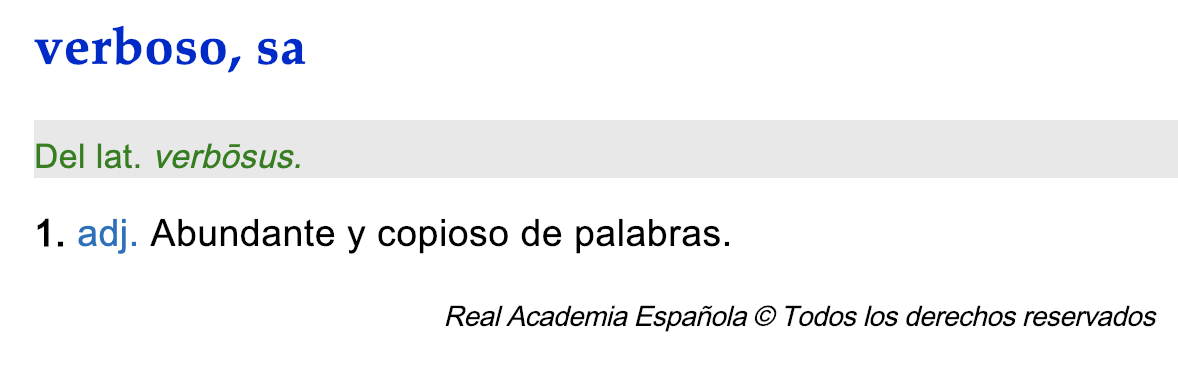

In [229]:
!git branch  # Check current branch names

* master


In [230]:
!git diff master origin/master  # git diff <local branch> <remote>/<remote branch> 

fatal: ambiguous argument 'origin/master': unknown revision or path not in the working tree.
Use '--' to separate paths from revisions, like this:
'git <command> [<revision>...] -- [<file>...]'


In [231]:
!git push origin master

Counting objects: 8, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (8/8), 626 bytes | 125.00 KiB/s, done.
Total 8 (delta 0), reused 0 (delta 0)
To https://github.com/noelruault/git-crash-course.git
 * [new branch]      master -> master


In [232]:
!git diff master origin/master # EMPTY

## Creating a new branch and analyzing its behaviour

When you create a new branch, you will configure a copy of the current directory state.

!! **CREATE MASTER BRANCH**

> `git push origin <branch_name>`

> `git push origin master`

In [233]:
!(git checkout -b new_branch && git push origin new_branch && git branch) | git branch

* master
Switched to a new branch 'new_branch'
Total 0 (delta 0), reused 0 (delta 0)
remote: 
remote: Create a pull request for 'new_branch' on GitHub by visiting:
remote:      https://github.com/noelruault/git-crash-course/pull/new/new_branch
remote: 
To https://github.com/noelruault/git-crash-course.git
 * [new branch]      new_branch -> new_branch


In [234]:
!git checkout master

Switched to branch 'master'
Your branch is up to date with 'origin/master'.


In [235]:
!git add myapp/app.js && git commit -m "Add javascript file."

[master 219d889] Add javascript file.
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 myapp/app.js


In [236]:
!git diff master origin/master

diff --git a/myapp/app.js b/myapp/app.js
deleted file mode 100644
index e69de29..0000000


In [237]:
!git push origin master

Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (4/4), 327 bytes | 163.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://github.com/noelruault/git-crash-course.git
   ac890c5..219d889  master -> master


In [238]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.DS_Store
	.ipynb_checkpoints/
	assets/
	fundamentals.ipynb

nothing added to commit but untracked files present (use "git add" to track)


## Differences between current branches.

In [239]:
!git diff origin/new_branch master

diff --git a/myapp/app.js b/myapp/app.js
new file mode 100644
index 0000000..e69de29


In [240]:
!git diff master origin/new_branch

diff --git a/myapp/app.js b/myapp/app.js
deleted file mode 100644
index e69de29..0000000


## Updating the development environment

### Fetching

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/fetch.png)

When executing `git fetch`, the data from **remote repository** only travel to the **local repository**.

### Pulling

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/pull.png)

When executing `git pull`, the data from **remote repository** travel to 2 areas:

*   To **local repository**: `fetch`
*   To **working directory**: `merge`



In [242]:
!git checkout origin/new_branch  # != git checkout new_branch

Note: checking out 'origin/new_branch'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ac890c5 Add first line to html file.


You can checkout to new_branch without origin, but ensure that the branch is aligned with remote...
Eg: 
> `git checkout new_branch new`

> `git reset origin/new_branch --hard`

In [252]:
!git checkout new_branch  # Going to local branch

Previous HEAD position was ac890c5 Add first line to html file.
Switched to branch 'new_branch'


In [253]:
!git checkout origin/new_branch  # Going to remote branch

Note: checking out 'origin/new_branch'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ac890c5 Add first line to html file.



If you take care the commit history, consider the use of `git pull --rebase`. Instead of `fetch + merge`, it consists of `fetch + rebase`. Your local commits will be replayed and you won’t see the known *diamond shape* in commit history.

![](https://raw.githubusercontent.com/rachelcarmena/how-to-teach/master/git/pull-rebase.png)

To learn more about pull & rebase: 
- https://www.atlassian.com/git/tutorials/syncing/git-pull
- https://www.atlassian.com/git/tutorials/merging-vs-rebasing

In [248]:
!git checkout origin/new_branch

HEAD is now at ac890c5 Add first line to html file.


In [254]:
!git reset origin/new_branch --hard

HEAD is now at ac890c5 Add first line to html file.


In [255]:
!sed -i -- 's/master/new_branch/g' myapp/index.html && cat myapp/index.html

<!-- Author: Noel Ruault. -->
<!-- First line from new_branch. -->


In [256]:
!git add myapp/index.html && git commit -m "Change first line, it is mine!" && git log

[detached HEAD 49dee59] Change first line, it is mine!
 1 file changed, 1 insertion(+), 1 deletion(-)


In [257]:
!git checkout -B new_branch && git push origin new_branch

Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (4/4), 363 bytes | 181.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To https://github.com/noelruault/git-crash-course.git
   ac890c5..49dee59  new_branch -> new_branch


# Still pending... 

In [ ]:
# !git pull origin master --rebase && git status && git log

In [ ]:
!git checkout master && sed -i -- 's/new_branch/master, again/g' myapp/index.html && cat myapp/index.html

In [ ]:
!git add myapp/index.html && git commit -m "Change first line, it is property of master!"

In [258]:
!git checkout master

Switched to branch 'master'
Your branch is up to date with 'origin/master'.


In [259]:
!git merge origin/new_branch && git branch

hint: Waiting for your editor to close the file... Ignoring binding_of_caller-0.8.0 because its extensions are not built.  Try: gem pristine binding_of_caller --version 0.8.0
Ignoring binding_of_caller-0.7.2 because its extensions are not built.  Try: gem pristine binding_of_caller --version 0.7.2
Ignoring byebug-10.0.2 because its extensions are not built.  Try: gem pristine byebug --version 10.0.2
Ignoring byebug-9.0.6 because its extensions are not built.  Try: gem pristine byebug --version 9.0.6
Ignoring byebug-9.0.5 because its extensions are not built.  Try: gem pristine byebug --version 9.0.5
Ignoring byebug-5.0.0 because its extensions are not built.  Try: gem pristine byebug --version 5.0.0
Ignoring debug_inspector-0.0.3 because its extensions are not built.  Try: gem pristine debug_inspector --version 0.0.3
Ignoring debug_inspector-0.0.2 because its extensions are not built.  Try: gem pristine debug_inspector --version 0.0.2
2019-01-30 18:20:14.132 Emacs-x86_64-10_10[13876:28

## Next steps

You can add another area in the development environment to explain stashing: **dirty working directory**.

If people internalize these concepts, it will be easier for you to go a step further with branches, commit history, rebasing, etc. because you will have built a solid basis.



## Friendly reminder

I’ve worked with other version control systems (Visual SourceSafe, TFS and Subversion) and, in my humble experience, a lack of knowledge can be harmful with both an old tool and a new one. Don’t only focus on choosing a tool, but also on mastering it.



## Further reading

*   [Pro Git book](https://git-scm.com/book/en)



## Received feedback

My friend [Marc Villagrasa](https://twitter.com/marcvege) reminds me that he found it very useful to solve [Git challenges](https://www.slideshare.net/raquelmorenocarmena/git-challenges) and to share the solutions among colleagues.

Resources from [comments at Hacker News](https://news.ycombinator.com/item?id=18919599):

*   [Linus Torvalds’ greatest invention](http://perl.plover.com/yak/git/)
*   [Tech Talk: Linus Torvalds on git](https://www.youtube.com/watch?v=4XpnKHJAok8)
*   [Linux.conf.au 2013 \- Git For Ages 4 And Up](https://www.youtube.com/watch?v=1ffBJ4sVUb4)
*   [Git From the Bottom Up](https://jwiegley.github.io/git-from-the-bottom-up)
*   [Git From the Bottom Up (PDF)](http://ftp.newartisans.com/pub/git.from.bottom.up.pdf)
*   [Learn Git Branching](https://learngitbranching.js.org)
*   [Flight rules for git](https://github.com/k88hudson/git-flight-rules)
*   [Emacs package: Magit](https://magit.vc)
*   [How to write a Good Commit Message](https://chris.beams.io/posts/git-commit/)
*   [Become a git guru](https://www.atlassian.com/git/tutorials)
*   [Git Immersion](http://gitimmersion.com)
*   [Udacity: How to Use Git and GitHub](https://eu.udacity.com/course/how-to-use-git-and-github--ud775#)

After reading more [comments at Reddit](https://www.reddit.com/r/programming/comments/agko6r/how_to_teach_git/), I think that a more accurate title for this post would be **An idea to teach Git**, because it’s only an idea that appeared in my head when learning Git by myself a few years ago with [Pro Git book](https://git-scm.com/book/en). This post is not a complete guide, only a starting point for trainers. I’m sure all of these resources will be very useful as well. Thanks!

And thanks [Stuart Maxwell](https://stuartm.com) who shared this post at Hacker News and [u/cryptoz](https://www.reddit.com/user/cryptoz) who shared it at Reddit!

[« How to make images accessible](https://rachelcarmena.github.io/2018/12/18/how-to-make-images-accessible.html) [Test\-driven programming workflows »](https://rachelcarmena.github.io/2018/11/13/test-driven-programming-workflows.html)
